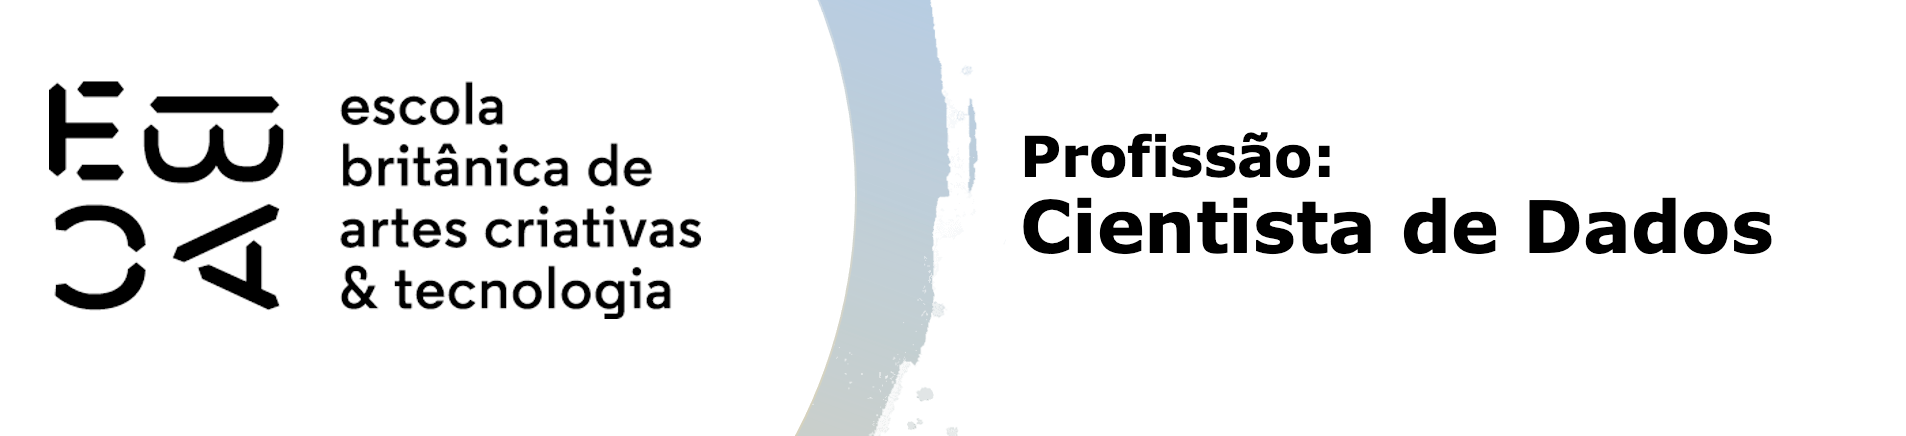

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from gower import gower_matrix
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [6]:
df = pd.read_csv('online_shoppers_intention.csv')

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [12]:
(1908/10422)*100

18.307426597582037

#### Temos portando, que o "normal" é que 18,3% das sessões resultem em compra

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [16]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [18]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

C:\Users\Hanga\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Revenue', ylabel='Administrative'>

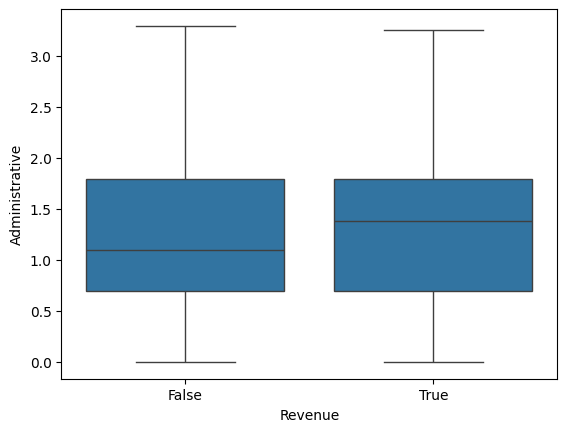

In [20]:
sns.boxplot(x=df['Revenue'], y=np.log(df['Administrative']))

C:\Users\Hanga\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Revenue', ylabel='Informational'>

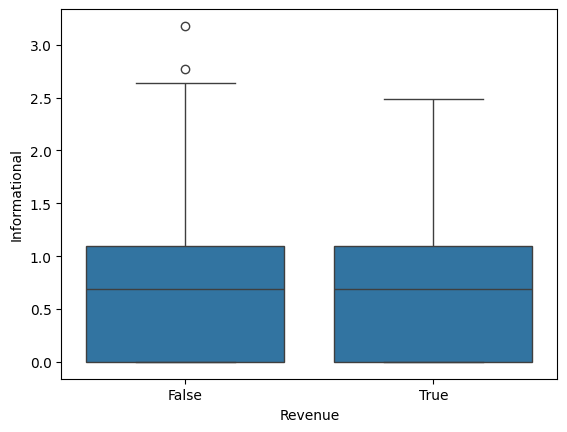

In [22]:
sns.boxplot(x=df['Revenue'], y=np.log(df['Informational']))

C:\Users\Hanga\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Revenue', ylabel='ProductRelated'>

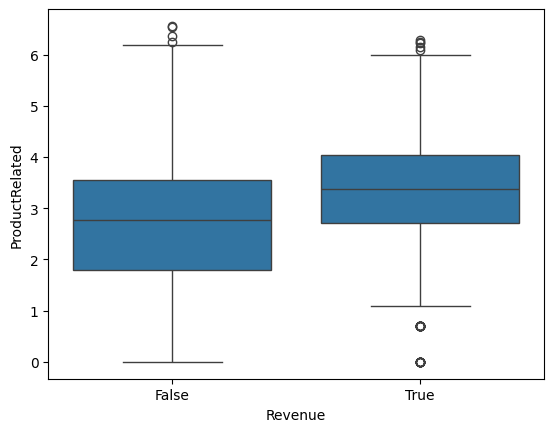

In [24]:
sns.boxplot(x=df['Revenue'], y=np.log(df['ProductRelated']))

<Axes: xlabel='Month', ylabel='Revenue'>

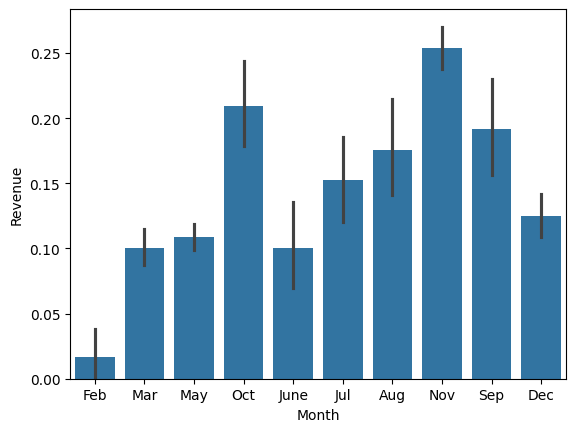

In [26]:
sns.barplot(x=df['Month'], y=df['Revenue'])

<Axes: xlabel='VisitorType', ylabel='Revenue'>

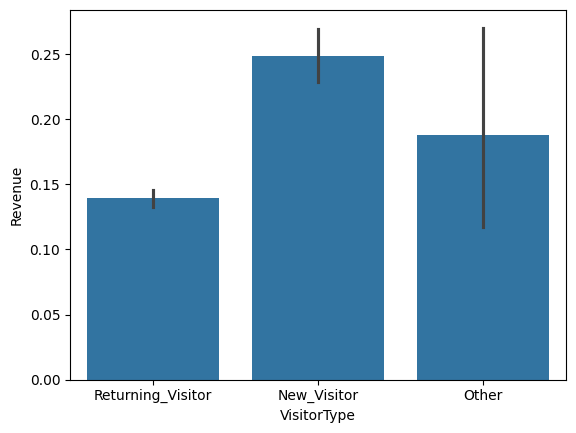

In [27]:
sns.barplot(x=df['VisitorType'], y=df['Revenue'])

<Axes: xlabel='Weekend', ylabel='Revenue'>

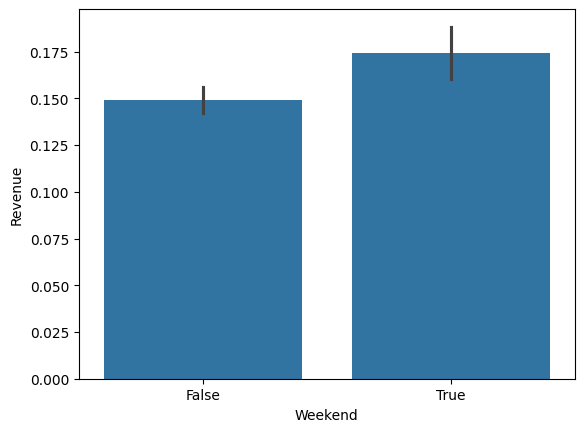

In [28]:
sns.barplot(x=df['Weekend'], y=df['Revenue'])

<Axes: xlabel='Revenue', ylabel='ProductRelated_Duration'>

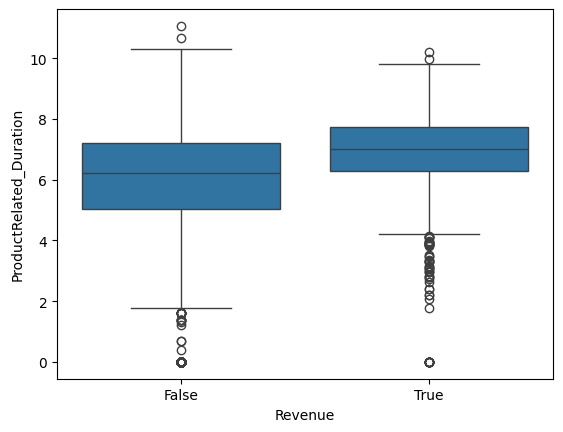

In [29]:
sns.boxplot(x=df['Revenue'], y=np.log(df['ProductRelated_Duration'] + 1))

In [31]:
df_corr = df.select_dtypes(include="number")

In [32]:
corr_matrix = df_corr.corr()

<Axes: >

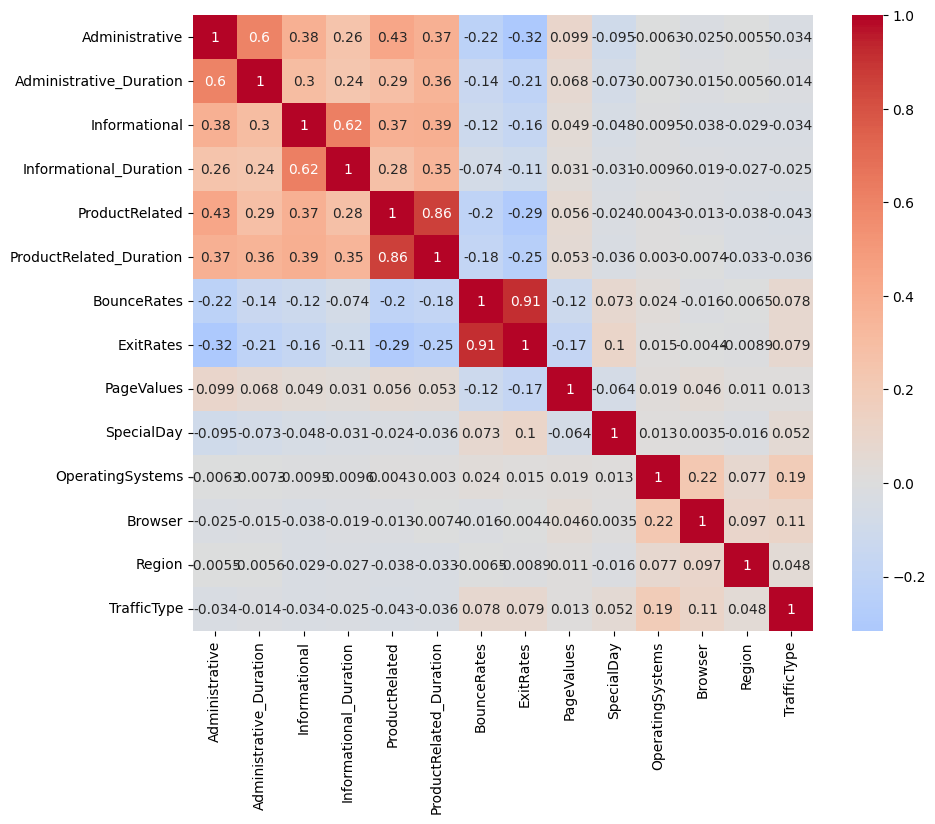

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

In [39]:
df['BounceRates']

0        0.200000
1        0.000000
2        0.200000
3        0.050000
4        0.020000
           ...   
12325    0.007143
12326    0.000000
12327    0.083333
12328    0.000000
12329    0.000000
Name: BounceRates, Length: 12330, dtype: float64

#### Precisamos evitar a seleção de variáveis que "dizem a mesma coisa"

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [44]:
variaveis = ['ProductRelated', 'BounceRates', 'SpecialDay', 'PageValues', 'Month', 'VisitorType']

#### As variáveis foram selecionadas levando em consideração:
- Multicolinearidade
- Quantitativa/Qualitativa
- Relevância
- Coerência

In [47]:
variaveis_cat = variaveis[3:]

In [49]:
variaveis_cat

['PageValues', 'Month', 'VisitorType']

In [51]:
df2 = pd.get_dummies(df[variaveis].dropna())
df2.head()

,ProductRelated,BounceRates,SpecialDay,PageValues,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,1,0.20,0.0,0.0,False,False,True,False,False,False,False,False,False,False,False,False,True
1,2,0.00,0.0,0.0,False,False,True,False,False,False,False,False,False,False,False,False,True
2,1,0.20,0.0,0.0,False,False,True,False,False,False,False,False,False,False,False,False,True
3,2,0.05,0.0,0.0,False,False,True,False,False,False,False,False,False,False,False,False,True
4,10,0.02,0.0,0.0,False,False,True,False,False,False,False,False,False,False,False,False,True


In [53]:
df2.columns.values

array(['ProductRelated', 'BounceRates', 'SpecialDay', 'PageValues',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'], dtype=object)

In [55]:
vars_cat = [True if x in {'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'} else False for x in df2.columns]

In [57]:
vars_cat

[False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [59]:
df2.shape

(12330, 17)

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [64]:
%%time
distancia_gower = gower_matrix(df2, cat_features=vars_cat) # Demora bastante para executar, somente rode a célula caso necessário

In [74]:
gdv = squareform(distancia_gower,force='tovector') # Converte uma matriz de distâncias para um vetor

In [76]:
gdv.shape

(76008285,)

In [88]:
%%time
Z = linkage(gdv, method='complete')
Z_df = pd.DataFrame(Z, columns=['id1','id2','dist','n'])
Z_df.head(10)

CPU times: total: 1.89 s
Wall time: 2.17 s


,id1,id2,dist,n
0,0.0,2.0,0.0,2.0
1,1.0,14.0,0.0,2.0
2,16.0,12330.0,0.0,3.0
3,6.0,79.0,0.0,2.0
4,24.0,12332.0,0.0,4.0
5,50.0,12334.0,0.0,5.0
6,64.0,12335.0,0.0,6.0
7,70.0,12336.0,0.0,7.0
8,85.0,12337.0,0.0,8.0
9,91.0,12338.0,0.0,9.0


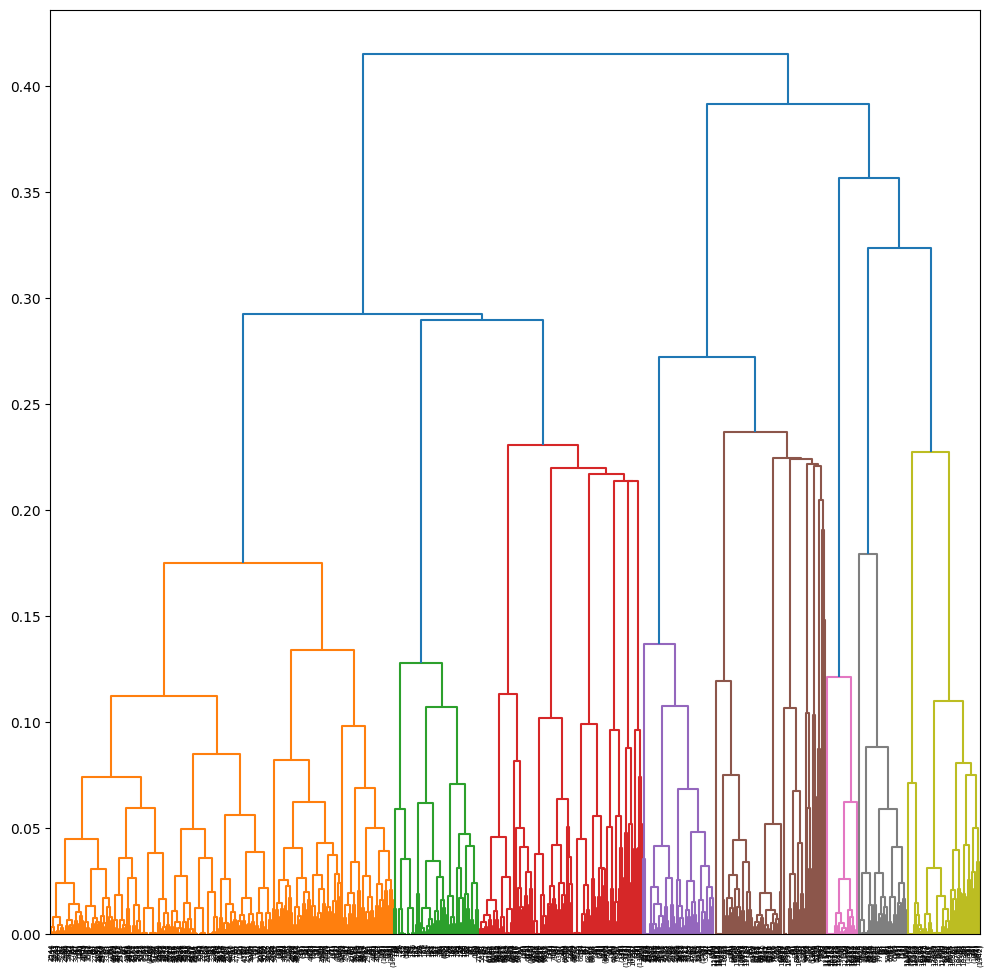

In [112]:
fig, axs = plt.subplots(1, 1, figsize=(12, 12))
dn = dendrogram(
    Z, 
    truncate_mode='level',  # Truncate to the top p levels
    p=10,  # Show only the top 5 levels
    show_leaf_counts=True,  # Show the number of observations in each cluster leaf
    ax=axs,  # Use the created axes
    color_threshold=.24  # Set the color threshold
)

In [94]:
df2['grupo_3_clusters'] = fcluster(Z, 3, criterion='maxclust')
df2['grupo_3_clusters'].value_counts()

grupo_3_clusters
1    7737
3    2899
2    1694
Name: count, dtype: int64

In [96]:
df2['grupo_4_clusters'] = fcluster(Z, 4, criterion='maxclust')
df2['grupo_4_clusters'].value_counts()

grupo_4_clusters
1    7737
4    2837
2    1694
3      62
Name: count, dtype: int64

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [100]:
df3 = df.reset_index().merge(df2.reset_index(), how='left')

In [122]:
df3.groupby(['VisitorType', 'Month', 'grupo_3_clusters'])['index'].count().unstack().fillna(0).style.format(precision=0)

In [152]:
df3.groupby(['Revenue', 'VisitorType', 'grupo_3_clusters'])['index'].count().unstack().fillna(0).style.format(precision=0)

In [148]:
df3.groupby(['VisitorType', 'Month', 'grupo_4_clusters'])['index'].count().unstack().fillna(0).style.format(precision=0)

In [154]:
df3.groupby(['Revenue', 'VisitorType', 'grupo_4_clusters'])['index'].count().unstack().fillna(0).style.format(precision=0)

Text(0, 0.5, 'PageValues')

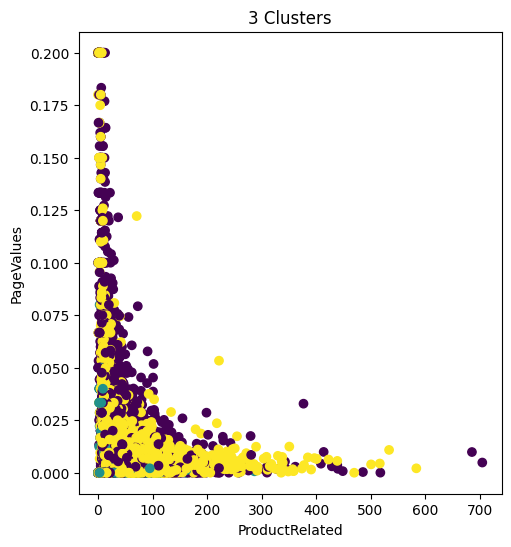

In [142]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df2['ProductRelated'], df2['BounceRates'], c=df2['grupo_3_clusters'], cmap='viridis')
plt.title('3 Clusters')
plt.xlabel('ProductRelated')
plt.ylabel('PageValues')

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

#### O grupo 1 (3 e 4 clusters) possui maior propensão à compra. Em geral os clusters que criamos fazem um bom trabalho em evidenciar o perfil de uma sessão que não irá gerar receita, porém não evidencia tao bem o perfil das sessões que irão gerar receita.